# Firefighter Fatalities Investigation

This Jupyter Notebook investigates firefighter fatalities from a public dataset provided by the Federal Emergency Management Agency (FEMA). The U.S. Fire Administration tracks and collects information on the causes of on-duty firefighter fatalities that occur in the United States. This dataset contains this collected data which is hosted on the FEMA website. Below is the current link for this dataset as of 09/18/2020.

Link: https://apps.usfa.fema.gov/firefighter-fatalities/

## Motivation For Investigation

My personal motivation for investigating this dataset is because I want to, in the near future, become a volunteer firefighter myself. I find firefighting to be such a rewarding way to give back to the community around me and hope to become a part of this community someday. Thus, I think it would be useful to have some background knowledge regarding firefighting prior to enrolling as a volunteer firefighter. This dataset provides me one way to do this by becoming better equiped to knowing the analysis of firefighters deaths with the hope that one day this knowledge could help prevent a future firefighter death whether it be a fellow firefighter or myself.

## Introductory Analysis

Below analysis on the dataset starts by importing the needed python libraries and dataset into this Jupyter Notebook. This provides a fire glance into the what the dataset contains.

In [671]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from datetime import datetime
from fastai.tabular.all import *

%matplotlib inline
sns.set_theme()

In [672]:
df = pd.read_csv('ff_data_2021.csv')
df_original = df.copy()

In [673]:
df.head()

,Initial summary,First name,Last name,Middle name,Age,Rank,Classification,Incident date,Date of death,Cause of death,Nature of death,Activity,Emergency,Duty,Property type,Memorial fund info
0,"Firefighter Pollard was driving a rescue vehicle to a wildland fire. While enroute, he collapsed and was treated by first responders and then airlifted to a hospital. Firefighter Pollard died the next day on January 1, 2000. Firefighter Pollard died of a cerebral bleed (stroke/CVA).\r\n\r\n",Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,"Pump Operator/Inspector Purdy was operating a top-mounted pump panel at the scene of a residential structure fire. Pump Operator/Inspector Purdy asked his wife, a volunteer paramedic, for a drink. When she returned to the truck with the drink, she saw him fall from the truck, the victim of a massive heart attack. Medical aid was provided immediately. Pump Operator/Inspector Purdy was transported to a local hospital where he was pronounced dead 20 minutes after his arrival. No autopsy was performed.\r\n\r\n",Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN
2,"First Assistant Chief Osadacz was on the scene of a vehicle fire that resulted from the collision of a pickup truck with a tree. While working on the scene, First Assistant Chief Osadacz was struck in the groin area by a water stream from a 1� -inch hoseline. First Assistant Chief Osadacz was agitated by this occurrence, left the scene, and returned to his home. Upon his arrival at home, First Assistant Chief Osadacz complained of indigestion, took some over-the-counter medicine, and laid down to rest. Within a few moments, First Assistant Chief Osadacz was struck with a fatal heart at...",Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,Responding,Street/Road,NaN
3,"Firefighter Streeter responded to a trash and grass fire in the department�s brush truck. Shortly after exiting the vehicle, Firefighter Streeter collapsed of an apparent heart attack. CPR was administered immediately by other firefighters, and an ambulance was summoned. Firefighter Streeter was a charter member of the Ranch Drive Volunteer Fire Department.\r\n\r\n",Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
4,"Firefighter Bankert was participating in fire department sponsored dive training in a rock quarry that contains a private lake used exclusively for recreational diving. Firefighter Bankert was a member of his department�s search and recovery dive team. As the class ascended from the third of three dives, the class stopped for a safety and accountability check at a depth of 15 feet. At the time of the check, Firefighter Bankert was present; however, when the class proceeded to the surface, Firefighter Bankert did not surface. Other divers went immediately to the bottom of the lake and f...",Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


### Data Cleaning

Several steps are taken below to clean the data of unnecessary columns or missing data.

In [674]:
# Drop the Initial Summary Column for now since it full of supplimentary and not needed information regarding the incident.
df = df.drop(columns=['Initial summary'])

columns = list(df.columns)
fixed_cols = []

# Format the column names to be lowercase and have a underscore instead of spaces
for col in columns:
    col = col.lower()
    col = col.replace(' ', '_')
    fixed_cols.append(col)

df.columns = fixed_cols
df.head()

,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
0,Robert,Pollard,Dale,64.0,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Cerebrovascular Accident,Riding Vehicle/Apparatus,Yes,Responding,Outdoor Property,NaN
1,Lee,Purdy,A.,57.0,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN
2,Ronald,Osadacz,J.,36.0,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,Responding,Street/Road,NaN
3,Allen,Streeter,L.,58.0,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
4,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Caught or Trapped,Drowning,Other,No,Training,NaN,NaN


In [675]:
# Convert the dates to datetime for easy manipulation
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

In [676]:
# Visually show how many unique values are inside each column
df.nunique()

first_name             546
last_name             1948
middle_name            535
age                     75
rank                   290
classification           8
incident_date         1629
date_of_death         1639
cause_of_death          13
nature_of_death         12
activity                23
emergency                2
duty                     7
property_type           11
memorial_fund_info     589
dtype: int64

In [677]:
# Test to see if we have any null / missing values within the dataset
df.isnull().values.any()

True

In [678]:
# Sum up these null values for each column of the dataset
df.isnull().sum()

first_name               0
last_name                0
middle_name            211
age                    360
rank                     7
classification           3
incident_date            1
date_of_death            0
cause_of_death          13
nature_of_death          7
activity                17
emergency                0
duty                     6
property_type          307
memorial_fund_info    1568
dtype: int64

In [679]:
# Fill na values with unknown
df['age'].fillna(-99, inplace=True)
df['rank'].fillna('Unknown', inplace=True)
df['classification'].fillna('Unknown', inplace=True)
df['cause_of_death'].fillna('Unknown', inplace=True)
df['nature_of_death'].fillna('Unknown', inplace=True)
df['activity'].fillna('Unknown', inplace=True)
df['duty'].fillna('Unknown', inplace=True)
df['property_type'].fillna('Unknown', inplace=True)

# Fill the one na value with an estimate based off of the notes in the data
df['incident_date'].fillna(pd.Timestamp('2003-02-03'), inplace=True)

In [680]:
# Sum up these null values for each column of the dataset
df.isnull().sum()

first_name               0
last_name                0
middle_name            211
age                      0
rank                     0
classification           0
incident_date            0
date_of_death            0
cause_of_death           0
nature_of_death          0
activity                 0
emergency                0
duty                     0
property_type            0
memorial_fund_info    1568
dtype: int64

#### Rank

Doing a quick value counts shows over 287 "unique" ranks. Let's try to conslidate a few of these categories best we can by combining some ranks together.

In [681]:
value_count_ranks = df['rank'].value_counts()
value_count_ranks[:30]

Firefighter                 1025
Lieutenant                   205
Captain                      201
Fire Chief                   120
Firefighter/Paramedic         40
Assistant Fire Chief          40
Assistant Chief               40
Battalion Chief               37
Firefighter/EMT               34
Chief                         31
Pilot                         29
Engineer                      22
Fire Police Captain           20
Deputy Chief                  18
Fire Police Officer           16
Fire Captain                  13
Inmate Firefighter            12
Firefighter-EMT               10
Deputy Fire Chief              9
Firefighter II                 8
Fire Marshal                   8
Fire Police Lieutenant         8
Fire Engineer                  8
Probationary Firefighter       8
Unknown                        7
Safety Officer                 6
Firefighter 1st Grade          6
Fire Apparatus Operator        6
Firefighter/Engineer           5
Firefighter III                5
Name: rank

In [682]:
value_count_ranks[-50:]

Firefighter/President                     1
Pilot, Wildland                           1
Firefighter-AEMT                          1
Training Captain                          1
Forest Service Engineering Technician     1
Firefighter & Dept. President             1
Fire Commissioner & Safety Officer        1
First Captain                             1
First Officer/Copilot                     1
Assistant Chief/EMT/SAR Coordinator       1
Fire Management Officer                   1
Pilot (Contract)                          1
Apparatus Operator                        1
Driver / Operator                         1
Captain-Safety Officer                    1
Firefighter/Fire Police Officer           1
Firefighter/Safety officer                1
Firefighter/Assistant Helitack Manager    1
Firefighter Specialist                    1
Firefghter                                1
Firefighter I                             1
Foreman                                   1
First Deputy Commissioner       

In [683]:
df['rank'].head(10)

0                Firefighter
1    Pump Operator/Inspector
2      First Assistant Chief
3                Firefighter
4                Firefighter
5                    Captain
6        Firefighter/Trustee
7                 Fire Chief
8                Firefighter
9                    Captain
Name: rank, dtype: object

In [684]:
# Returns a list of two strings
def split_col(rank):
    return rank.split('/')[:]

# Returns a single string switched in order
def switch_join_col(rank):
    return '/'.join([rank[1], rank[0]])

# Returns a string in a uniform format
def uniform_col(rank):
    rank = rank.lower()
    rank = rank.replace(' / ', '/')
    rank = rank.replace(' /', '/')
    rank = rank.replace('/ ', '/')
    rank = rank.replace(' - ', '-')
    rank = rank.replace(' -', '-')
    rank = rank.replace('- ', '-')
    rank = rank.replace('-', '/')
    rank = rank.replace('2', 'ii')
    rank = rank.replace('3', 'iii')
    rank = rank.replace('firefigher', 'firefighter')
    rank = rank.replace('(contract)', '')
    rank = rank.replace('  ', '')
    rank = rank.replace('acting ', '')
    rank = rank.replace('fire chief', 'chief')
    rank = rank.replace('chief', 'fire chief')
    rank = rank.replace('ex/captain', 'captain')
    return rank

# Returns a string in alphabetical order
def order_col(rank):
    if '/' in rank:
        temp = split_col(rank)
        if temp[0][0] > temp[1][0]:
            rank = switch_join_col(temp)
    return rank

# Returns a string with applied conditional switching
def conditional_col(rank):
    if '/' in rank:
        temp = split_col(rank)
        if temp[0] == 'firefighter' and temp[1] != 'emt' and temp[1] != 'paramedic':
            rank = ''.join([temp[0]])
    return rank

def firefighter_col(rank):
    if '/' in rank:
        temp = split_col(rank)
        if temp[1] == 'firefighter':
            rank = switch_join_col(temp)
    return rank

def lieutenant_col(rank):
    if '/' in rank:
        temp = split_col(rank)
        if temp[1] == 'lieutenant':
            rank = switch_join_col(temp)
    return rank

# Returns the column in a uniform format
def finalize_col(rank):
    rank = rank.title()
    rank = rank.replace('Iii', 'III')
    rank = rank.replace('Ii', 'II')
    rank = rank.replace('Emt', 'EMT')
    rank = rank.replace('Co/Pilot', 'Co-Pilot')
    rank = rank.replace('Captain ', 'Captain')
    return rank

unique_ranks_prior = len(df['rank'].value_counts())
print(f'There are {unique_ranks_prior} unique ranks in the dataset prior to combining groups.')
print(df['rank'].value_counts()[:10])

# Apply these formating functions using list comprehensions
df['rank'] = [uniform_col(x) for x in df['rank']]
df['rank'] = [order_col(x) for x in df['rank']]
df['rank'] = [firefighter_col(x) for x in df['rank']]
df['rank'] = [lieutenant_col(x) for x in df['rank']]
df['rank'] = [conditional_col(x) for x in df['rank']]
df['rank'] = [finalize_col(x) for x in df['rank']]

unique_ranks_post = len(df['rank'].value_counts())
print(f'There are {unique_ranks_post} unique ranks in the dataset after combining groups.')
print(df['rank'].value_counts()[:10])

There are 291 unique ranks in the dataset prior to combining groups.
Firefighter              1025
Lieutenant                205
Captain                   201
Fire Chief                120
Firefighter/Paramedic      40
Assistant Fire Chief       40
Assistant Chief            40
Battalion Chief            37
Firefighter/EMT            34
Chief                      31
Name: rank, dtype: int64
There are 212 unique ranks in the dataset after combining groups.
Firefighter              1093
Captain                   207
Lieutenant                206
Fire Chief                152
Assistant Fire Chief       80
Firefighter/EMT            53
Firefighter/Paramedic      46
Battalion Fire Chief       38
Pilot                      29
Deputy Fire Chief          27
Name: rank, dtype: int64


## Understanding Which Firefighters Are At Risk

Here several graphs are shown to help visualize which group(s) of firefighters are at risk of workplace fatalities.

The first obvious group of firefighters that we can see from the dataset is the group that tragically lost their lives during 9/11. 15% of all firefighter fatalities occured on this day of history. For the sake of understanding the statistics around firefighter fatalities, the group from that day will be excluded from here on out since that horrible day would be considered an anomaly when considering your typically firefighter's career.

In [685]:
# 9/11 only dataset
df_911 = df.loc[df['incident_date'] == pd.Timestamp('2001-09-11')]
df_911 = df_911.loc[df_911['emergency'].str.lower() == 'yes']

# Drop the 9/11 fatalities from the dataset and save a copy off all fatalities for later use
df_all = df.copy()
df = df.drop(df[(df['incident_date'] == pd.Timestamp('2001-09-11')) * (df['emergency'].str.lower() == 'yes')].index)

percent_911 = (round(len(df_911) / len(df_all), 2)) * 100
percent_rest = 100 - percent_911

print(f'{percent_911}% of firefighter fatalities occured on 9/11.')

15.0% of firefighter fatalities occured on 9/11.
C:\Users\abcja\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


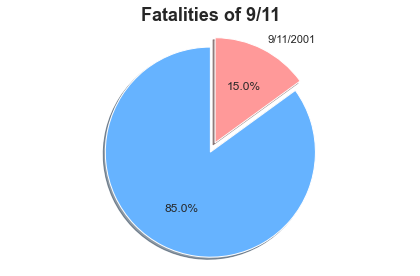

In [686]:
labels = ['', '9/11/2001']
sizes = [percent_rest, percent_911]

explode = (0, 0.1)
colors = ['#66b3ff','#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.set_title('Fatalities of 9/11', fontweight='bold', fontsize=18)

plt.tight_layout()
# plt.savefig('images/911_pie_chart.png', bbox_inches='tight')

In [687]:
cat_names = ['rank', 'classification', 'cause_of_death', 'nature_of_death', 'activity', 'emergency', 'duty', 'property_type', 'memorial_fund_info']
cont_names = ['age', 'incident_date', 'date_of_death']

print('Number of categorial columns: ', len(cat_names))
print('Number of continous columns: ', len(cont_names))

Number of categorial columns:  9
Number of continous columns:  3


## To summarize thus far:

The dataset started with 2,355 firefighter fatalities with 343 of those occuring from the 9/11 incident. These have been excluded from the data leaving us with 2012 fatalities, which is where the remaining analysis will focus. Within the remaining data we potentially have 9 useful categorial columns and 3 useful continous columns (we will assume the date is a contious relationship).

### Categorial columns

Here we can investigate the categories visually to attempt to get a visual insight to any fatality trends.

#### Rank Column

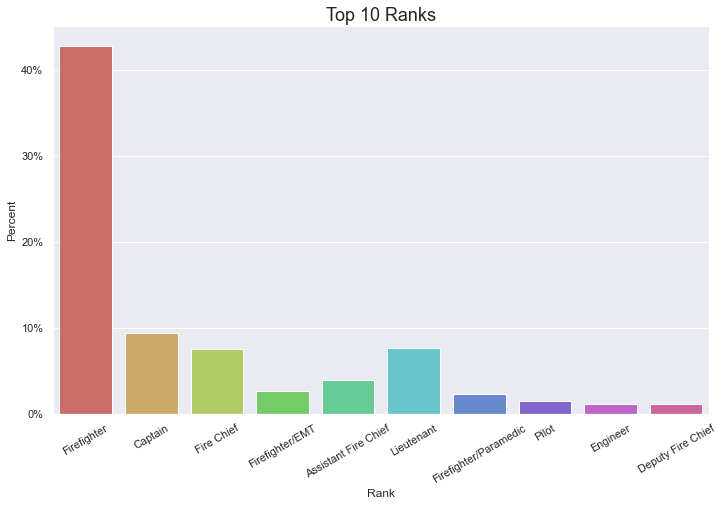

In [688]:
# Get only top 10 ranks from dataset
top_10_rank = df['rank'].value_counts()[:10]
top_10_list = top_10_rank.index
top_10_list
top_10 = df.loc[df['rank'].isin(top_10_list)]

# Plot using seaborn
g = sns.catplot(x='rank', kind='count', palette='hls', data=top_10, height=6, aspect=10/6)
plt.title('Top 10 Ranks', fontsize=18)
plt.xlabel('Rank')
plt.ylabel('Percent')
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat];
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012, decimals=0))
# plt.savefig('images/ranks.png', bbox_inches='tight')

### Classification

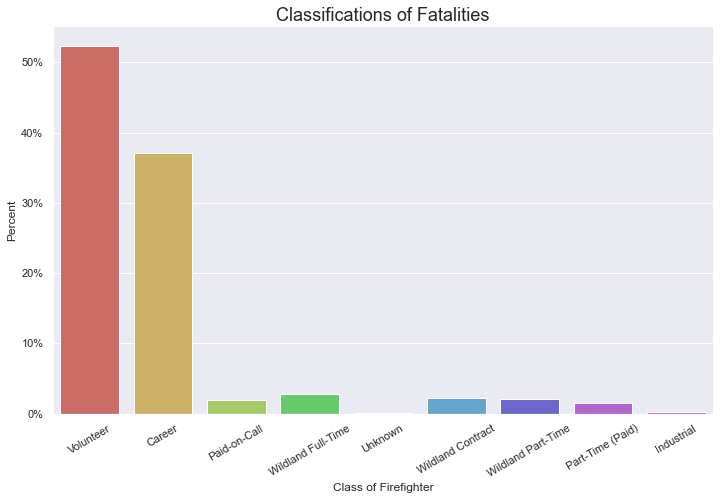

In [689]:
g = sns.catplot(x='classification', kind='count', palette='hls', data=df, height=6, aspect=10/6)
plt.title('Classifications of Fatalities', fontsize=18)
plt.xlabel('Class of Firefighter')
plt.ylabel('Percent')
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat]
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012))
# plt.savefig('images/classifications.png', bbox_inches='tight')

### Cause of Death

In [690]:
# Quick clean up of the cause of death names
def cod_clean(rank):
    rank = rank.replace('Vehicle Collision - Includes Aircraft', 'Vehicle Collision')
    rank = rank.replace('Caught or Trapped', 'Caught/Trapped')
    return rank

df['cause_of_death'] = [cod_clean(x) for x in df['cause_of_death']]

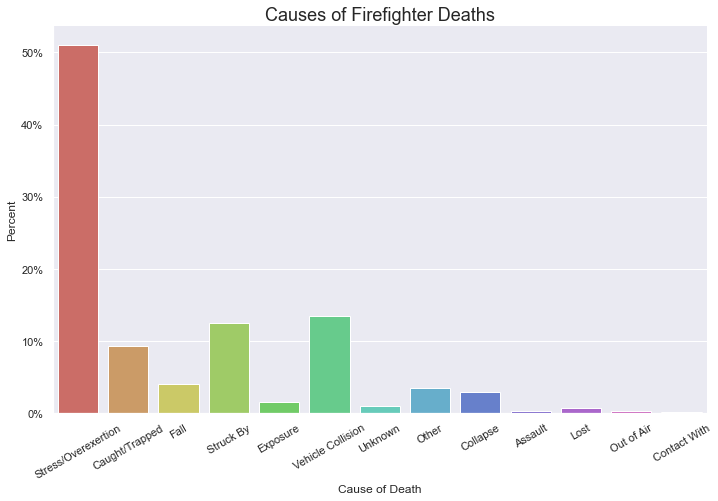

In [691]:
g = sns.catplot(x='cause_of_death', kind='count', palette='hls', data=df, height=6, aspect=10/6)
plt.title('Causes of Firefighter Deaths', fontsize=18)
plt.xlabel('Cause of Death')
plt.ylabel('Percent')
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat]
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012));
# plt.savefig('images/cause_of_death.png', bbox_inches='tight')

### Nature of death

In [692]:
def nod_clean(rank):
    rank = rank.replace('Cerebrovascular Accident', 'Stroke/CVA')
    return rank

df['nature_of_death'] = [nod_clean(x) for x in df['nature_of_death']]

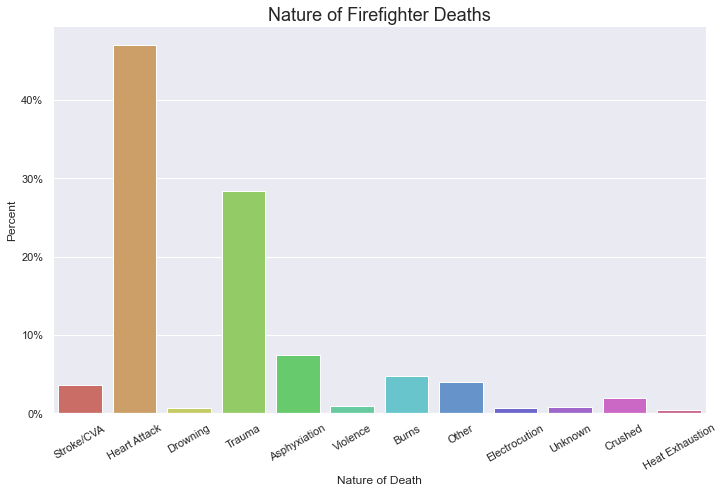

In [693]:
g = sns.catplot(x='nature_of_death', kind='count', palette='hls', data=df, height=6, aspect=10/6)
plt.title('Nature of Firefighter Deaths', fontsize=18)
plt.xlabel('Nature of Death')
plt.ylabel('Percent')
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat]
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012, decimals=0));
# plt.savefig('images/nature_of_death.png', bbox_inches='tight')

### Activity

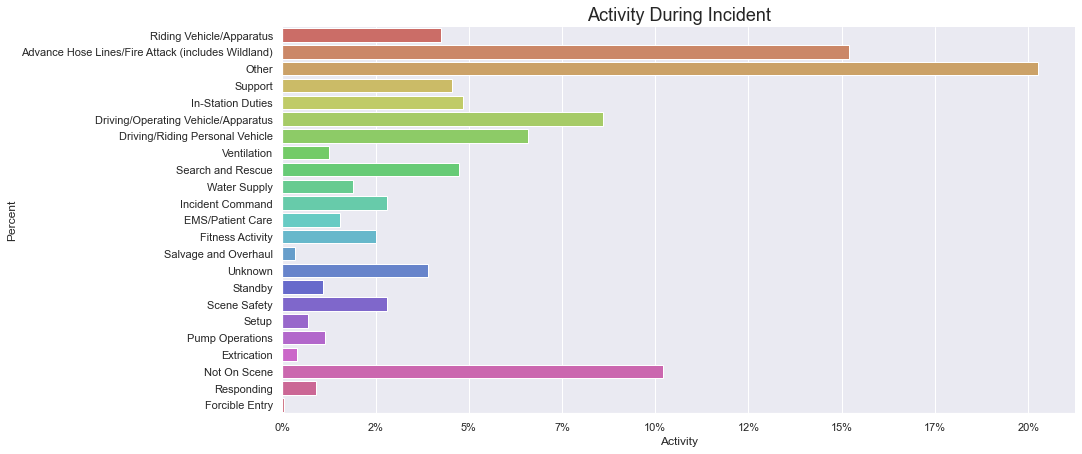

In [694]:
g = sns.catplot(data=df, y='activity', kind='count', palette='hls', height=6, aspect=2.5)
plt.title('Activity During Incident', fontsize=18)
plt.xlabel('Activity')
plt.ylabel('Percent')
plt.gca().xaxis.set_major_formatter(PercentFormatter(2012, decimals=0))
# plt.savefig('images/activity_during_incident.png', bbox_inches='tight')

### Emergency

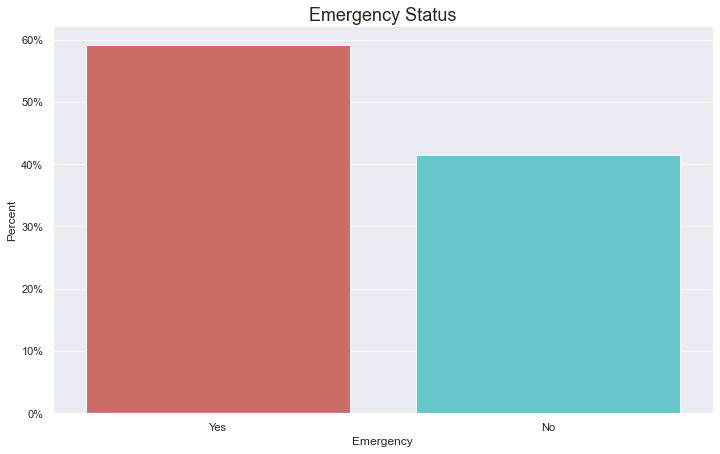

In [695]:
g = sns.catplot(x='emergency', kind='count', palette='hls', data=df, height=6, aspect=10/6)
plt.title('Emergency Status', fontsize=18)
plt.xlabel('Emergency')
plt.ylabel('Percent')
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012, decimals=0));
# plt.savefig('images/emergency.png', bbox_inches='tight')

### Duty

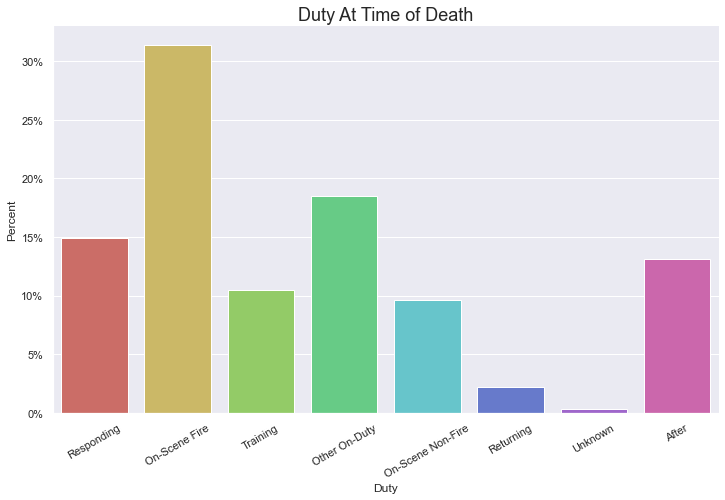

In [696]:
g = sns.catplot(x='duty', kind='count', palette='hls', data=df, height=6, aspect=10/6)
plt.title('Duty At Time of Death', fontsize=18)
plt.xlabel('Duty')
plt.ylabel('Percent')
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat]
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012, decimals=0));
# plt.savefig('images/duty_at_death.png', bbox_inches='tight')

### Property Type

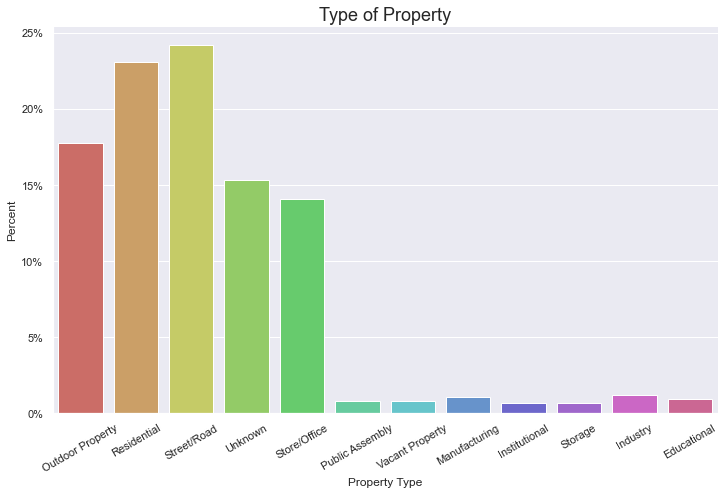

In [697]:
g = sns.catplot(x='property_type', kind='count', palette='hls', data=df, height=6, aspect=10/6)
plt.title('Type of Property', fontsize=18)
plt.xlabel('Property Type')
plt.ylabel('Percent')
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat]
plt.gca().yaxis.set_major_formatter(PercentFormatter(2012, decimals=0));
# plt.savefig('images/property_type.png', bbox_inches='tight')

## Continous Columns

### Age

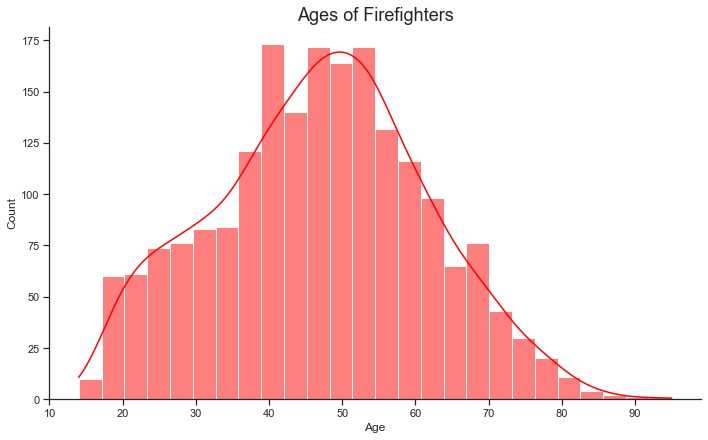

In [698]:
# Remove the missing values from data set
age_df = df.loc[df['age'] != -99]

with sns.axes_style("ticks"):
    sns.displot(data=age_df, x='age', height=6, aspect=10/6, kde=True, color='red')
    plt.title('Ages of Firefighters', fontsize=18)
    plt.xlabel('Age')
    plt.ylabel('Count');
    # plt.savefig('images/age_of_firefighter.png', bbox_inches='tight')

### Date of Incident and Death

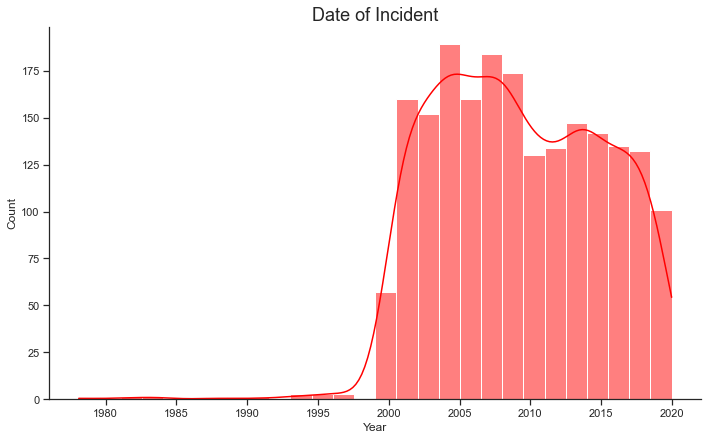

In [699]:
with sns.axes_style("ticks"):
    sns.displot(data=df, x='incident_date', height=6, aspect=10/6, kde=True, color='red')
    plt.title('Date of Incident', fontsize=18)
    plt.xlabel('Year')
    plt.ylabel('Count')
    # plt.savefig('images/date_incident.png', bbox_inches='tight')

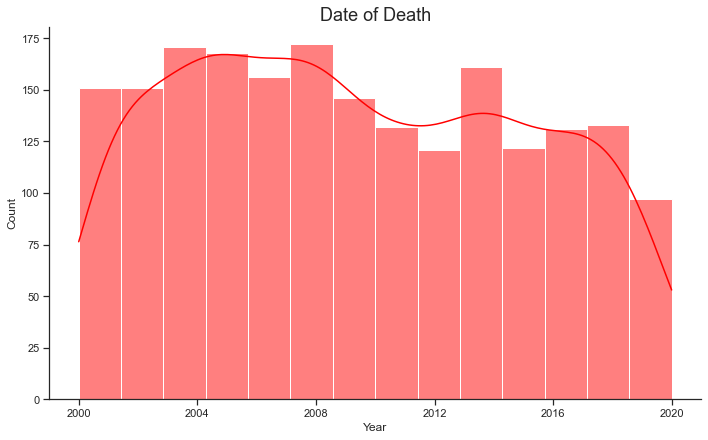

In [700]:
with sns.axes_style("ticks"):
    sns.displot(data=df, x='date_of_death', height=6, aspect=10/6, kde=True, color='red')
    plt.title('Date of Death', fontsize=18)
    plt.xlabel('Year')
    plt.ylabel('Count')
    # plt.savefig('images/date_of_death.png', bbox_inches='tight')

In [701]:
df.columns

Index(['first_name', 'last_name', 'middle_name', 'age', 'rank',
       'classification', 'incident_date', 'date_of_death', 'cause_of_death',
       'nature_of_death', 'activity', 'emergency', 'duty', 'property_type',
       'memorial_fund_info'],
      dtype='object')

In [702]:
cat_names = ['rank', 'classification', 'cause_of_death', 'nature_of_death', 'activity', 'emergency', 'duty', 'property_type', 'memorial_fund_info']
cont_names = ['age', 'incident_date', 'date_of_death']

## Comparing the variables to the incident date

This will show changes in the various categories over time. Results from this section will show if the most likely causes of incident have changed over time.

In [703]:
# Exclude incidents prior to 2000 because of a lack of data to make it representative of incidents
df_copy = df.copy()
df = df[df['incident_date'].dt.year >= datetime(2000, 1, 1).year]

In [704]:
years = list(df['incident_date'].dt.year.unique())

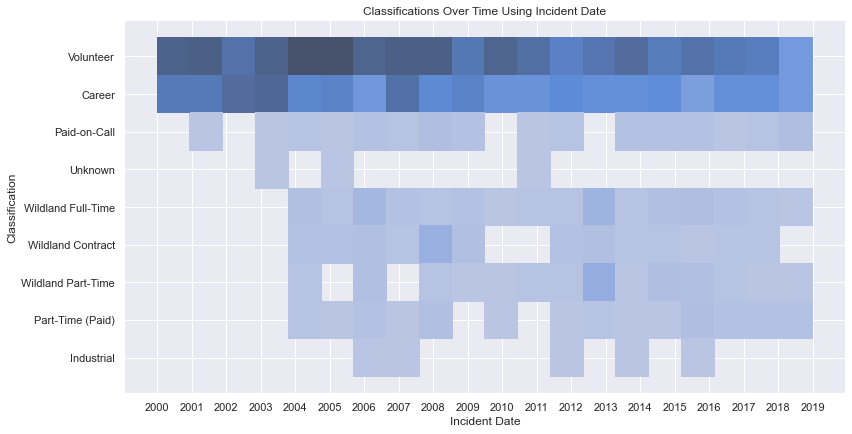

In [705]:
sns.displot(data=df, x=df['incident_date'].dt.year, y='classification', height=6, aspect=2, bins=len(years))
plt.title('Classifications Over Time Using Incident Date')
plt.xlabel('Incident Date')
plt.ylabel('Classification')
plt.xticks(years);
# plt.savefig('images/classification_vs_incident_date.png', bbox_inches='tight')

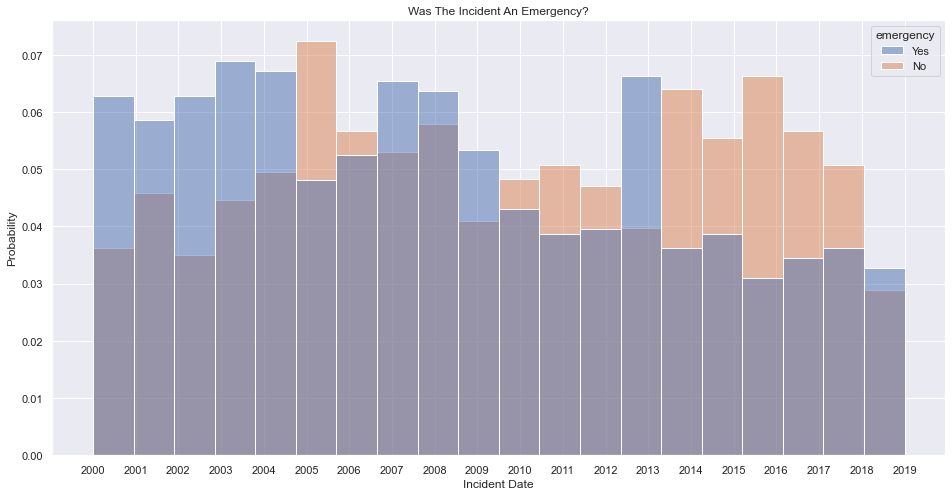

In [706]:
g = plt.figure(figsize=(16, 8))
sns.histplot(data=df, x=df['incident_date'].dt.year, hue='emergency', stat='probability', common_norm=False, bins=len(years))
plt.title('Was The Incident An Emergency?')
plt.xlabel('Incident Date')
plt.xticks(years);
# plt.savefig('images/emergency_vs_incident_date.png', bbox_inches='tight')

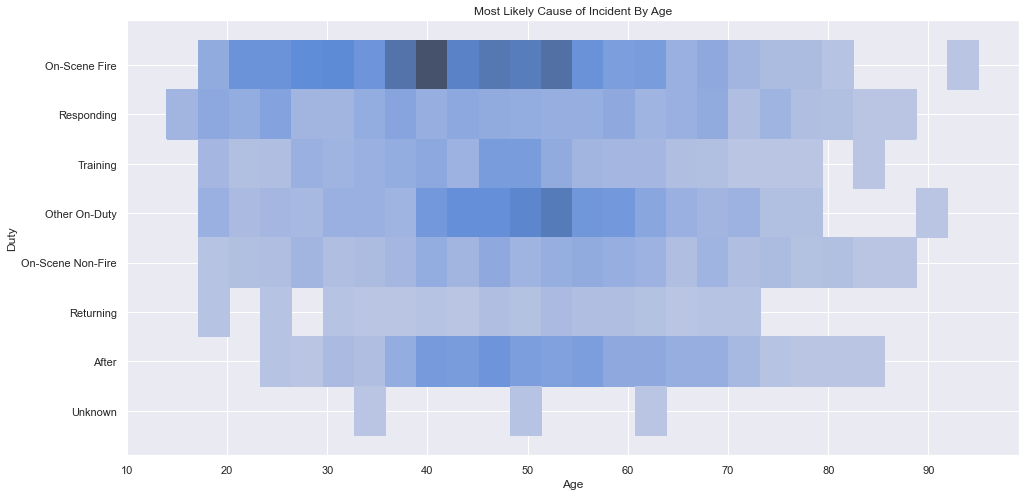

In [707]:
age_df = df[df['age'] != -99]
g = plt.figure(figsize=(16, 8))
sns.histplot(data=age_df, x='age', y='duty', common_norm=False)
plt.title('Most Likely Cause of Incident By Age')
plt.xlabel('Age')
plt.ylabel('Duty');
# plt.savefig('images/age_vs_duty.png', bbox_inches='tight')

In [708]:
age_bins = [10, 19, 29, 39, 49, 59, 69, 79, 89, 99]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
temp = pd.cut(x=age_df['age'], bins=age_bins, labels = age_labels)
age_df = pd.concat((age_df, temp.rename('age_bin')), axis=1)
age_df

,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info,age_bin
1,Lee,Purdy,A.,57.0,Inspector/Pump Operator,Volunteer,2000-01-08,2000-01-08,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN,50s
2,Ronald,Osadacz,J.,36.0,First Assistant Fire Chief,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,Responding,Street/Road,NaN,30s
3,Allen,Streeter,L.,58.0,Firefighter,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN,50s
4,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Caught/Trapped,Drowning,Other,No,Training,Unknown,NaN,30s
5,Juan,De Leon,Gilberto,53.0,Captain,Career,2000-01-17,2000-01-17,Stress/Overexertion,Heart Attack,Support,No,Other On-Duty,Store/Office,NaN,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,Robert,"White, Jr.",E.,65.0,Fire Chief,Volunteer,2019-12-05,2019-12-05,Stress/Overexertion,Heart Attack,Incident Command,Yes,On-Scene Fire,Residential,NaN,60s
2351,George,Childs,NaN,67.0,Driver/Engineer,Volunteer,2019-12-04,2019-12-05,Stress/Overexertion,Heart Attack,Unknown,Yes,On-Scene Fire,Residential,NaN,60s
2352,Kenneth,Jones,James,46.0,Firefighter,Career,2019-12-07,2019-12-07,Fall,Trauma,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN,40s
2353,Michael,"Cardinale, Sr.",A.,63.0,Firefighter,Volunteer,2019-12-18,2019-12-18,Stress/Overexertion,Heart Attack,Unknown,Yes,Other On-Duty,Street/Road,NaN,60s


In [709]:
weird_date = age_df.groupby('incident_date').count().idxmax().iloc[0]

In [710]:
df[df['incident_date'] == weird_date]

,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
1777,Andrew,Ashcraft,Sterling,29.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1778,Robert,Caldwell,E.,23.0,Squad Boss,Wildland Full-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1779,Travis,Carter,Clay,31.0,Squad Boss,Wildland Full-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1780,Dustin,DeFord,James,24.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1781,Christopher,MacKenzie,Alan Peebles,30.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1782,Eric,Marsh,Shane,43.0,Wildland Crew Supervisor,Wildland Full-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1783,Grant,McKee,Quinn,21.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1784,Sean,Misner,Michael,26.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1785,Scott,Norris,Daniel,28.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
1786,Wade,Parker,Scott,22.0,Firefighter,Wildland Part-Time,2013-06-30,2013-06-30,Caught/Trapped,Burns,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN


Text(11.713739004629623, 0.5, 'Age')

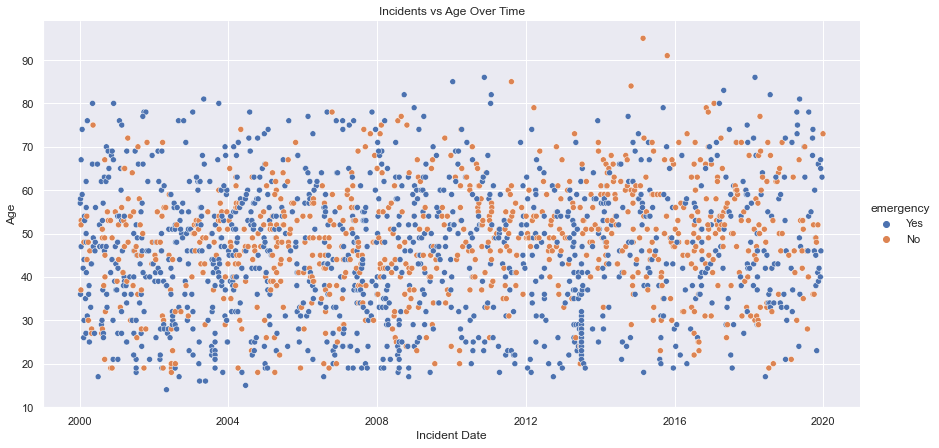

In [711]:
g = sns.relplot(data=age_df, x='incident_date', y='age', kind='scatter', height=6, aspect=2, hue='emergency')
plt.title('Incidents vs Age Over Time')
plt.xlabel('Incident Date')
plt.ylabel('Age')
# plt.savefig('images/incidents_vs_age_over_time.png', bbox_inches='tight')

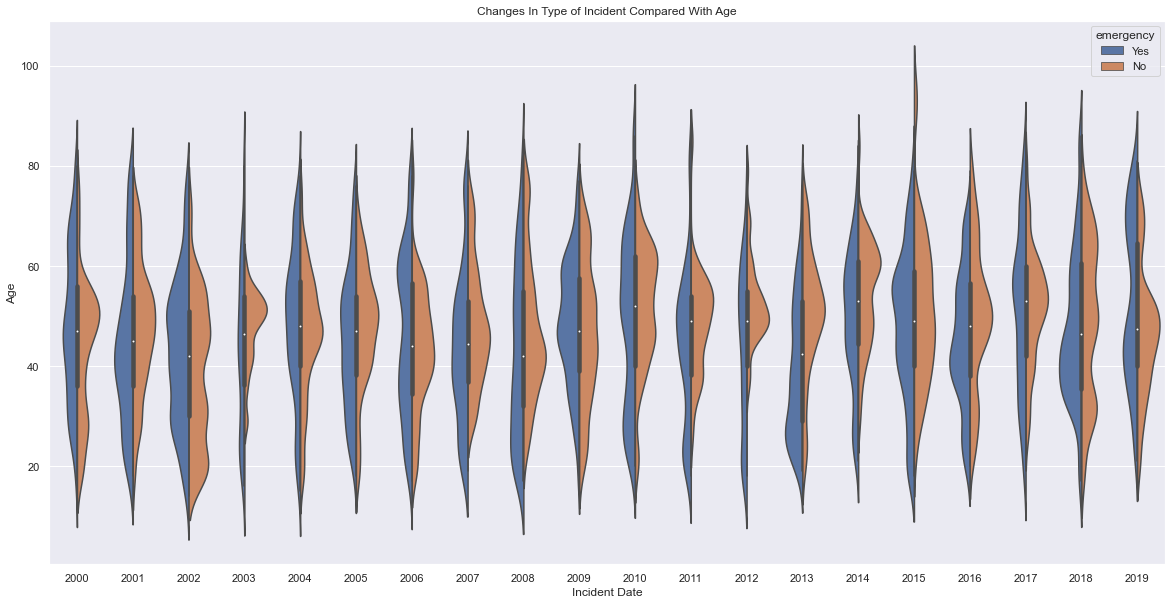

In [712]:
g = plt.figure(figsize=(20, 10))
sns.violinplot(data=age_df, x=age_df['incident_date'].dt.year, y='age', kind='violin', hue='emergency', split=True, bw=.3)
plt.title('Changes In Type of Incident Compared With Age')
plt.xlabel('Incident Date')
plt.ylabel('Age');
# plt.savefig('images/age_vs_emergency_over_time_changes.png', bbox_inches='tight')

In [713]:
age_df_no = age_df[age_df['emergency'] == 'No']
age_df_yes = age_df[age_df['emergency'] == 'Yes']

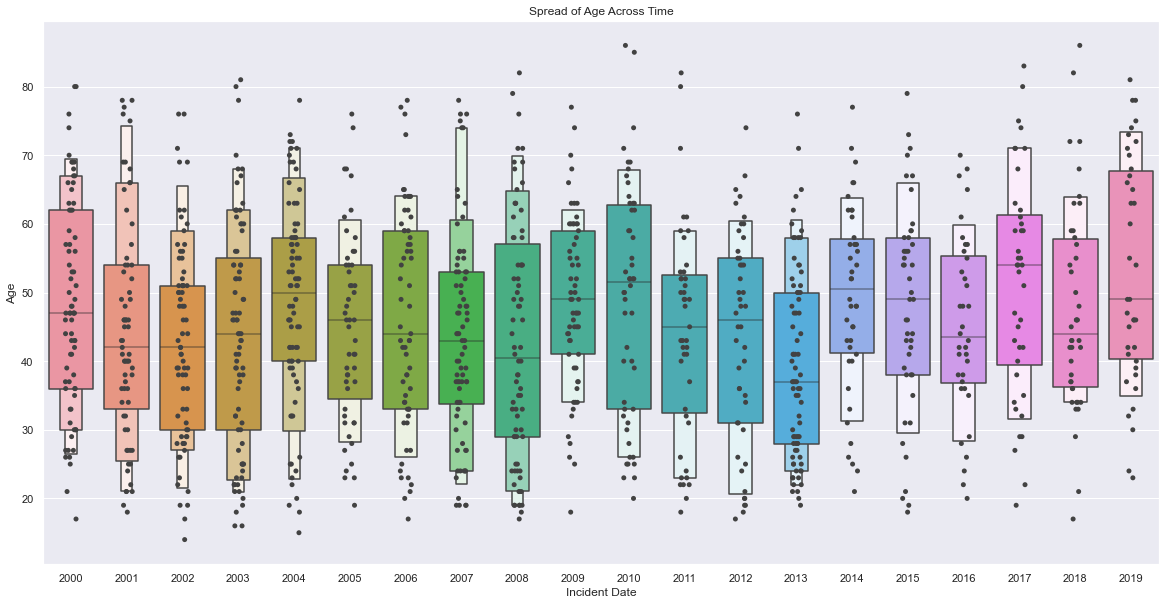

In [737]:
g = plt.figure(figsize=(20, 10))
sns.boxenplot(data=age_df, x=age_df_yes['incident_date'].dt.year, y='age', showfliers=False)
sns.stripplot(data=age_df, x=age_df_yes['incident_date'].dt.year, y='age', color='.26');
plt.title('Spread of Age Across Time')
plt.xlabel('Incident Date')
plt.ylabel('Age');
# plt.savefig('images/incident_date_by_age.png', bbox_inches='tight')

<Figure size 1440x720 with 0 Axes>

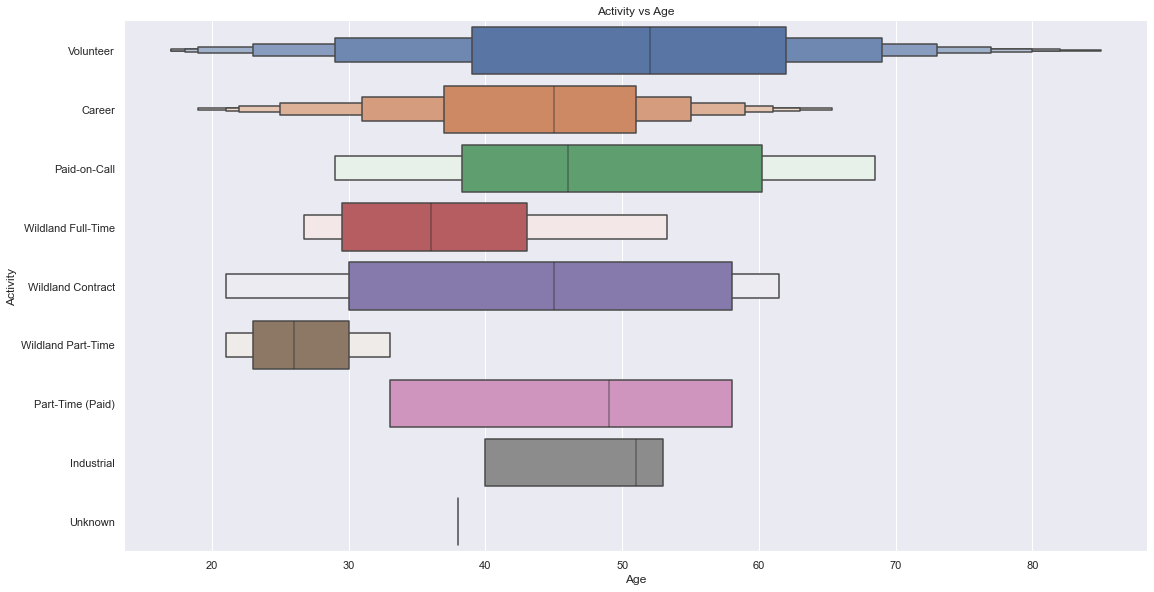

In [736]:
g = plt.figure(figsize=(20, 10))
sns.catplot(data=age_df, x='age', y='classification', kind='boxen', height=8, aspect=2, showfliers=False)
plt.title('Activity vs Age')
plt.xlabel('Age')
plt.ylabel('Activity');
# plt.savefig('images/classification_vs_age.png', bbox_inches='tight')

<Figure size 1440x720 with 0 Axes>

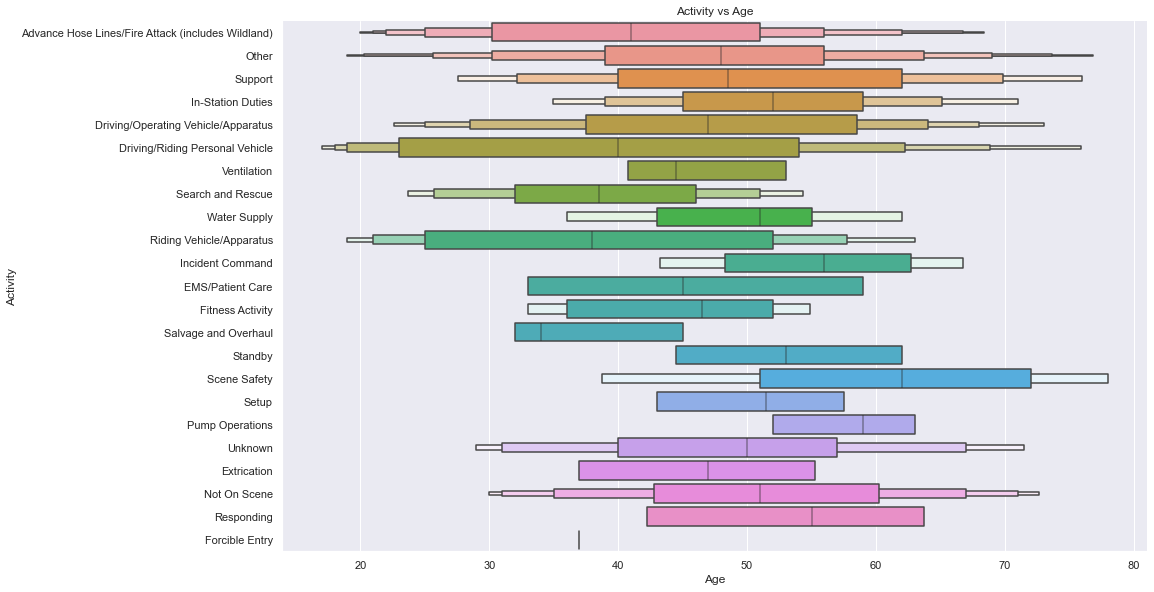

In [732]:
g = plt.figure(figsize=(20, 10))
sns.catplot(data=age_df, x='age', y='activity', kind='boxen', height=8, aspect=2, showfliers=False);
plt.title('Activity vs Age')
plt.xlabel('Age')
plt.ylabel('Activity');
# plt.savefig('images/activity_vs_age.png', bbox_inches='tight')

In [717]:
df.head()

,first_name,last_name,middle_name,age,rank,classification,incident_date,date_of_death,cause_of_death,nature_of_death,activity,emergency,duty,property_type,memorial_fund_info
1,Lee,Purdy,A.,57.0,Inspector/Pump Operator,Volunteer,2000-01-08,2000-01-08,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Residential,NaN
2,Ronald,Osadacz,J.,36.0,First Assistant Fire Chief,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,Responding,Street/Road,NaN
3,Allen,Streeter,L.,58.0,Firefighter,Volunteer,2000-01-11,2000-01-11,Stress/Overexertion,Heart Attack,Advance Hose Lines/Fire Attack (includes Wildland),Yes,On-Scene Fire,Outdoor Property,NaN
4,Gary,"Bankert, Sr",Lynn,37.0,Firefighter,Volunteer,2000-01-15,2000-01-15,Caught/Trapped,Drowning,Other,No,Training,Unknown,NaN
5,Juan,De Leon,Gilberto,53.0,Captain,Career,2000-01-17,2000-01-17,Stress/Overexertion,Heart Attack,Support,No,Other On-Duty,Store/Office,NaN
